# Data exploration
## To do
- Ta ut riktig data fra værmeldingene: 12t skip 12t (Done)
- Summere total kraftproduksjon per vindretning

In [1]:
from platform import python_version
print(python_version())

3.6.8


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [41]:
# import datasets

forecast1 = pd.read_csv("Data/windforecasts_wf1.csv")
forecast2 = pd.read_csv("Data/windforecasts_wf2.csv")
forecast3 = pd.read_csv("Data/windforecasts_wf3.csv")
forecast4 = pd.read_csv("Data/windforecasts_wf4.csv")
forecast5 = pd.read_csv("Data/windforecasts_wf5.csv")
forecast6 = pd.read_csv("Data/windforecasts_wf6.csv")
forecast7 = pd.read_csv("Data/windforecasts_wf7.csv")
train = pd.read_csv("Data/train.csv")
benchmark = pd.read_csv("Data/benchmark.csv")

forecasts = [forecast1, forecast2, forecast3, forecast4, forecast5, forecast6, forecast7]
# Forecast structure: date hors u v ws wd
#train structure: date wp1 wp2 wp3 wp4 wp5 wp6 wp7

In [40]:
plot_titles = []
for i in range(7):
    plot_titles.append(f'Windfarm {i+1}')

plot_titles

['Windfarm 1',
 'Windfarm 2',
 'Windfarm 3',
 'Windfarm 4',
 'Windfarm 5',
 'Windfarm 6',
 'Windfarm 7']

In [19]:
forecast1

,date,hors,u,v,ws,wd
0,2009070100,1,2.34,-0.79,2.47,108.68
1,2009070100,2,2.18,-0.99,2.40,114.31
2,2009070100,3,2.20,-1.21,2.51,118.71
3,2009070100,4,2.35,-1.40,2.73,120.86
4,2009070100,5,2.53,-1.47,2.93,120.13
5,2009070100,6,2.66,-1.29,2.96,115.79
6,2009070100,7,2.69,-0.81,2.81,106.71
7,2009070100,8,2.72,-0.26,2.73,95.39
8,2009070100,9,2.87,0.08,2.87,88.50
9,2009070100,10,3.23,-0.01,3.23,90.19


In [17]:
train.shape[0]

18757

In [26]:
train

,date,wp1,wp2,wp3,wp4,wp5,wp6,wp7
0,2009070100,0.045,0.233,0.494,0.105,0.056,0.118,0.051
1,2009070101,0.085,0.249,0.257,0.105,0.066,0.066,0.051
2,2009070102,0.020,0.175,0.178,0.033,0.015,0.026,0.000
3,2009070103,0.060,0.085,0.109,0.022,0.010,0.013,0.000
4,2009070104,0.045,0.032,0.079,0.039,0.010,0.000,0.000
5,2009070105,0.035,0.011,0.099,0.066,0.015,0.013,0.000
6,2009070106,0.005,0.000,0.069,0.105,0.015,0.079,0.000
7,2009070107,0.000,0.011,0.000,0.017,0.025,0.013,0.025
8,2009070108,0.000,0.016,0.000,0.017,0.046,0.000,0.000
9,2009070109,0.010,0.000,0.000,0.006,0.081,0.000,0.000


In [57]:
#forecast1.iloc[:train.shape[0], 5 ]
forecast1.iloc[48:48+12, 5]

48    103.17
49    103.36
50    100.63
51     96.42
52     92.38
53     90.73
54     94.09
55    102.78
56    114.58
57    124.63
58    135.16
59    155.24
Name: wd, dtype: float64

Text(0.5, 1.0, 'Windfarm 1')

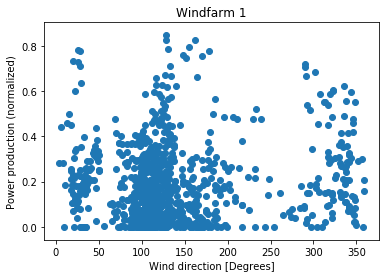

In [33]:
plt.scatter(forecast1.iloc[:1000, 5 ], train.iloc[:1000, 1])
plt.xlabel('Wind direction [Degrees]')
plt.ylabel('Power production (normalized)')
plt.title('Windfarm 1')

## Plotting function

In [133]:
def plot_power_vs_direction(name, dir_series, wp_series):
    plt.scatter(dir_series, wp_series)
    plt.xlabel('Wind direction')
    plt.ylabel('Power production')
    plt.title(name)

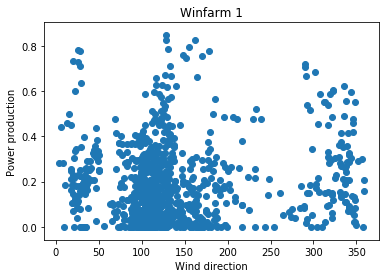

In [36]:
plot_power_vs_direction('Winfarm 1', forecast1.iloc[:1000,5], train.iloc[:1000,1])

In [43]:
forecasts[0].iloc[:10,5]

0    108.68
1    114.31
2    118.71
3    120.86
4    120.13
5    115.79
6    106.71
7     95.39
8     88.50
9     90.19
Name: wd, dtype: float64

# Data cleaning

In [82]:
# Extract correct wind predictions:
forecast_array = np.array([])
forecast1.shape[0]
for k in range(len(forecasts)):
    for i in range(0, forecast1.shape[0], 48):
            for j in range(12):
                forecast_array = np.append(forecast_array,forecasts[k].iloc[i+j, 5])



In [85]:
forecast_array.shape[0]/7

26208.0

In [127]:
# Splitting back into the 7 windfarms:
forecast_array2 = np.resize(forecast_array, (7,int(forecast_array.shape[0]/7)))

In [139]:
#forecast_array2[1][:12]

In [138]:
#forecast2.iloc[:12,5]

In [107]:
# Test om dataene har samme form:
print(forecast1.shape, forecast2.shape, forecast3.shape, forecast4.shape, forecast5.shape, forecast6.shape, forecast7.shape)

(104832, 6) (104832, 6) (104832, 6) (104832, 6) (104832, 6) (104832, 6) (104832, 6)


In [137]:
fdict = {'wf1': forecast_array2[0], 'wf2': forecast_array2[1], 'wf3': forecast_array2[2], 'wf4': forecast_array2[3], 'wf5': forecast_array2[4],
        'wf6': forecast_array2[5], 'wf7': forecast_array2[6]}
dfForecast = pd.DataFrame(data=fdict)
#dfForecast

# Plot vindretning vs  kraftproduksjon

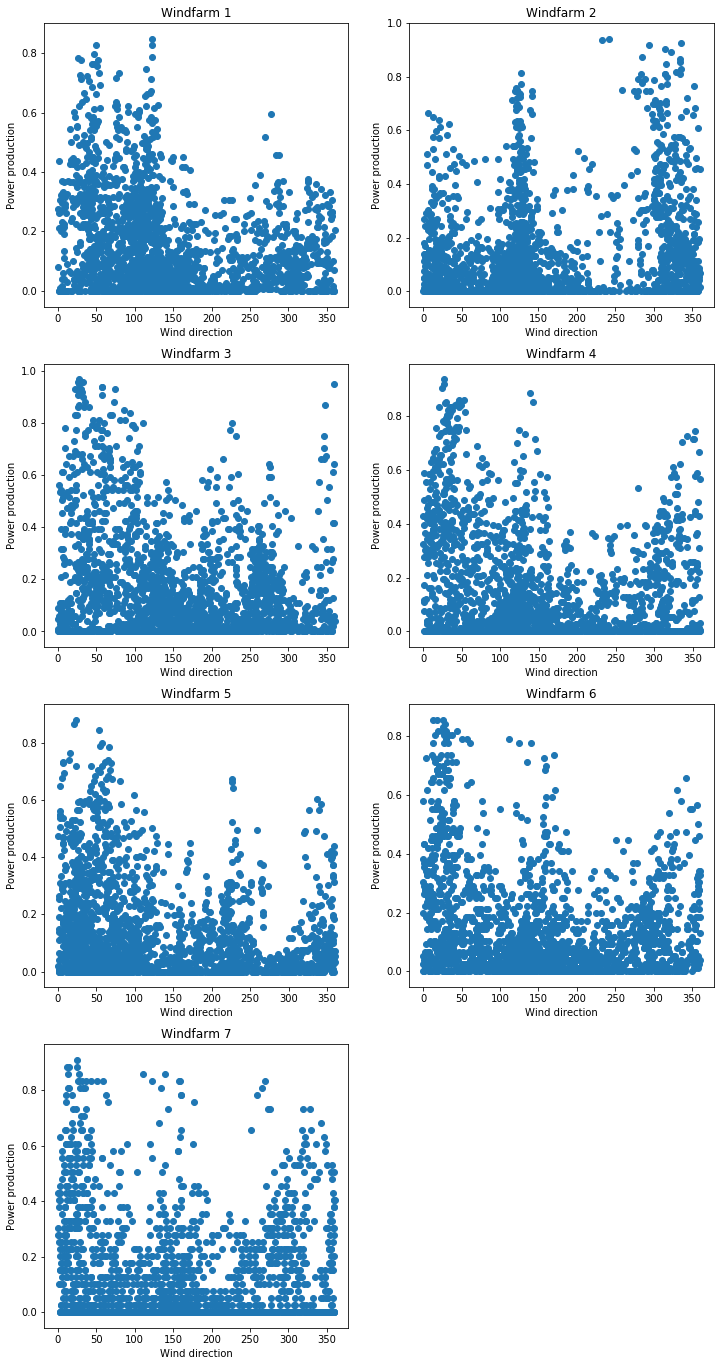

In [161]:
# Plot kraftproduksjon vs vindretning for alle vindparkene:

num_rows = 4
num_cols = 2
num_plots = 7
datapoints = 2000
plt.figure(figsize=(6*num_cols, 6*num_rows))
for i in range(num_plots):
    plt.subplot(num_rows, num_cols, i+1)
    plot_power_vs_direction(plot_titles[i], dfForecast.iloc[:datapoints,i], train.iloc[:datapoints, i+1])
    

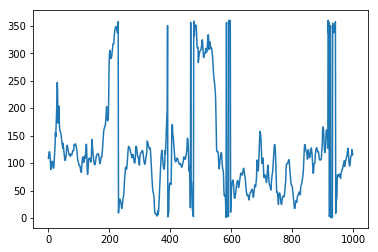

In [147]:
plt.plot(dfForecast.iloc[:1000,0])

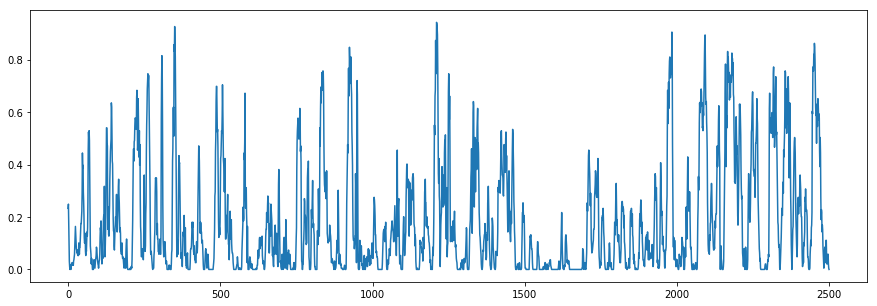

In [159]:
plt.figure(figsize=(15,5))
plt.plot(train.iloc[:2500, 2])
